### Capacity chart as proposed by Ana

The transcriptome and init rates are held constant (see /home/martin/git/TRSL/analysis/TRSL_vary_ribosomes_tRNA_uniform_transcriptome.py).

In [39]:
import cPickle as pkl
import numpy as np
import matplotlib
matplotlib.use("pgf")
pgf_with_rc_fonts = {
    "font.family": "serif",
    "font.serif": [u'Adobe Caslon Pro'],                   # use latex default serif font
    "font.sans-serif": ["DejaVu Sans"], # use a specific sans-serif font
}
matplotlib.rcParams.update(pgf_with_rc_fonts)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline
#matplotlib.style.use('ggplot')
import pandas as pd

from collections import defaultdict

/usr/lib/python2.7/dist-packages/ipykernel_launcher.py:4: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/lib/python2.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/usr/lib/python2.7/dist-packages/zmq/eventloop/ioloop.py", l

In [82]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

Runs in which tRNAs are co-varied:

Runs, produced with $\Delta t = 0.2 \mathrm{s}$:

Runs, produced with $\Delta t = 0.05 \mathrm{s}$:

In [143]:
runs = [
#r"/home/martin/git/TRSL/results/50000 ribosomes, 60000 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180320_1326_50000_ribosomes_1200s.p",
#r"/home/martin/git/TRSL/results/50000 ribosomes, 30061 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180320_1513_50000_ribosomes_1200s.p",
#r"/home/martin/git/TRSL/results/100000 ribosomes, 60000 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180320_1918_100000_ribosomes_1200s.p",
#r"/home/martin/git/TRSL/results/100000 ribosomes, 30061 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180320_2209_100000_ribosomes_1200s.p",
#r"/home/martin/git/TRSL/results/150000 ribosomes, 60000 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180321_0355_150000_ribosomes_1200s.p",
#r"/home/martin/git/TRSL/results/150000 ribosomes, 30061 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180321_0802_150000_ribosomes_1200s.p",
#r"/home/martin/git/TRSL/results/200000 ribosomes, 60000 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180321_1945_200000_ribosomes_1200s.p",
#r"/home/martin/git/TRSL/results/200000 ribosomes, 30061 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180322_0458_200000_ribosomes_1200s.p",
#r"/home/martin/git/TRSL/results/250000 ribosomes, 60000 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180322_1509_250000_ribosomes_1200s.p",
#r"/home/martin/git/TRSL/results/250000 ribosomes, 30061 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180322_2127_250000_ribosomes_1200s.p",    
#r"/home/martin/git/TRSL/results/300000 ribosomes, 60000 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180323_0818_300000_ribosomes_1200s.p",
#r"/home/martin/git/TRSL/results/300000 ribosomes, 30061 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180323_2138_300000_ribosomes_1200s.p",
#r"/home/martin/git/TRSL/results/350000 ribosomes, 60000 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180324_1359_350000_ribosomes_1200s.p",
#r"/home/martin/git/TRSL/results/350000 ribosomes, 30061 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180324_2207_350000_ribosomes_1200s.p",
#r"/home/martin/git/TRSL/results/400000 ribosomes, 60000 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180325_1145_400000_ribosomes_1200s.p",
#r"/home/martin/git/TRSL/results/400000 ribosomes, 30061 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180325_2108_400000_ribosomes_1200s.p",
r"/home/martin/git/TRSL/results/450000 ribosomes, 60000 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180326_1611_450000_ribosomes_1200s.p",
r"/home/martin/git/TRSL/results/450000 ribosomes, 30061 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180327_0301_450000_ribosomes_1200s.p",
]

Test runs with low ribosome counts, produced with $\Delta t = 0.05 \mathrm{s}$:

In [144]:
from tempfile import mkstemp
from shutil import move
from os import remove, close

def replace(file_path, pattern, subst):
    #Create temp file
    fh, abs_path = mkstemp()
    with open(abs_path,'w') as new_file:
        with open(file_path) as old_file:
            for line in old_file:
                new_file.write(line.replace(pattern, subst))
    close(fh)
    #Remove original file
    remove(file_path)
    #Move new file
    move(abs_path, file_path)

Only run once:

In [145]:
for run in runs:
    print run
    replace(run, "_numpypy.multiarray", "numpy.core.multiarray")

/home/martin/git/TRSL/results/450000 ribosomes, 60000 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180326_1611_450000_ribosomes_1200s.p
/home/martin/git/TRSL/results/450000 ribosomes, 30061 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s_20180327_0301_450000_ribosomes_1200s.p


In [146]:
from matplotlib.font_manager import FontProperties

ribo = {}
ribo_free = {}
ribo_bound = {}

for run in runs:
    results = pkl.load(open(run))
    print "transcriptome length: {}".format(len(results['transcriptome']))
    print results['description']
    
    if len(results['transcriptome']) in ribo:
        ribo[len(results['transcriptome'])].append(results['n_ribosomes'])
    else:
        ribo[len(results['transcriptome'])] = [results['n_ribosomes']]
        
    if len(results['transcriptome']) in ribo_free:
        ribo_free[len(results['transcriptome'])].append(results["timecourses"]["ribos._free"][-1])
    else:
        ribo_free[len(results['transcriptome'])] = [results["timecourses"]["ribos._free"][-1]]

    if len(results['transcriptome']) in ribo_bound:
        ribo_bound[len(results['transcriptome'])].append(results["timecourses"]["ribos._bound"][-1])
    else:
        ribo_bound[len(results['transcriptome'])] = [results["timecourses"]["ribos._bound"][-1]]

transcriptome length: 56592
450000 ribosomes, 60000 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s
transcriptome length: 28296
450000 ribosomes, 30061 phase transcriptome, varying tRNAs, constant exome, no decay, median constant initiation rates, deltat=0.05s


In [147]:
orf_genomic_dict = pkl.load(open("../../parameters/orf_coding.p"))

In [148]:
timecourses = {}

for run in runs:
    labellist = run.split(r"/")[-1].split(r",")
    ribos = int(labellist[0].split()[0])
    timecourses[ribos] = {}
    
for run in runs:
    labellist = run.split(r"/")[-1].split(r",")
    ribos = int(labellist[0].split()[0])
    phase = labellist[1].split("phase")[0].strip()
    results = pkl.load(open(run))
    timecourses[ribos][phase] = results['timecourses'] # we can now address as timecourses[100000]['S'] etc.
    
    # some genes have 5999, some 6000 timepoints, we have to fix that
    print "fixing uneven time series lengths..."
    num_timepoints = min([len(timecourses[ribos][phase][gene]) for gene in timecourses[ribos][phase]])

    print "creating timecourses..."
    timecourses[ribos][phase] = {key: timecourses[ribos][phase][key][:num_timepoints] 
                                 for key in timecourses[ribos][phase]
                                 if key in orf_genomic_dict}

fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...


In [149]:
ribo_numbers = sorted(timecourses.keys())
print ribo_numbers

[450000]


In [150]:
data = pd.Panel4D(timecourses)
data

/usr/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
Panel4D is deprecated and will be removed in a future version.
The recommended way to represent these types of n-dimensional data are with
the `xarray package <http://xarray.pydata.org/en/stable/>`__.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  """Entry point for launching an IPython kernel.


<class 'pandas.core.panelnd.Panel4D'>
Dimensions: 1 (labels) x 2 (items) x 24000 (major_axis) x 4716 (minor_axis)
Labels axis: 450000 to 450000
Items axis: 30061 to 60000
Major_axis axis: 0 to 23999
Minor_axis axis: YAL001C to YPR199C

In [151]:
total_protein = data.sum(axis=3)
total_protein

<class 'pandas.core.panel.Panel'>
Dimensions: 1 (items) x 2 (major_axis) x 24000 (minor_axis)
Items axis: 450000 to 450000
Major_axis axis: 30061 to 60000
Minor_axis axis: 0 to 23999

In [152]:
#print total_protein.minor_xs(59.98000000000001)
print total_protein.axes[2]
print len(total_protein.axes[2])

RangeIndex(start=0, stop=24000, step=1)
24000


We accept this index as it might be quicker and easier to address.

In [153]:
deltat = 0.05  # or 0.2

In [154]:
total_protein.minor_xs

<bound method Panel.minor_xs of <class 'pandas.core.panel.Panel'>
Dimensions: 1 (items) x 2 (major_axis) x 24000 (minor_axis)
Items axis: 450000 to 450000
Major_axis axis: 30061 to 60000
Minor_axis axis: 0 to 23999>

TODO: the 5998 and 4498 should be different depending on the delta t

/home/martin/.local/lib/python2.7/site-packages/matplotlib/axes/_base.py:2961: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=450000.0, right=450000.0
  'left=%s, right=%s') % (left, right))


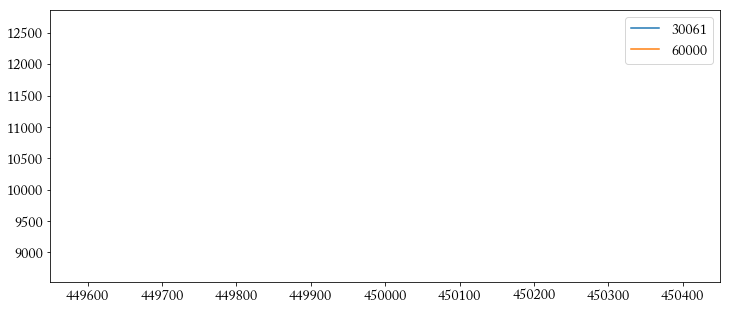

In [155]:
trans_eff_cell = (total_protein.minor_xs(23998) - total_protein.minor_xs(17998))/(300.0)
trans_eff_cell.T.plot()

In [156]:
ribo_numbers

[450000]

In [157]:
trans_eff_cell

,450000
30061,8723.93
60000,12670.92


In [158]:
trans_eff_per_ribo = trans_eff_cell/ribo_numbers

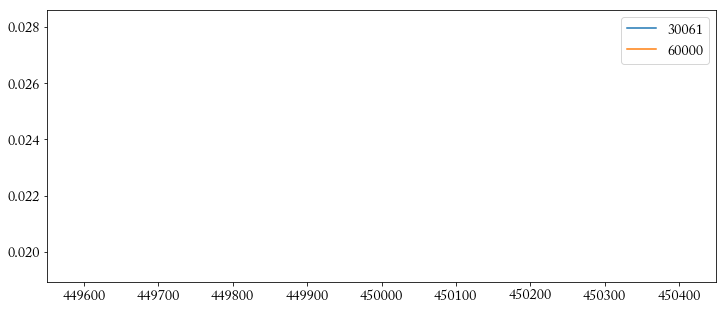

In [159]:
trans_eff_per_ribo.T.plot()

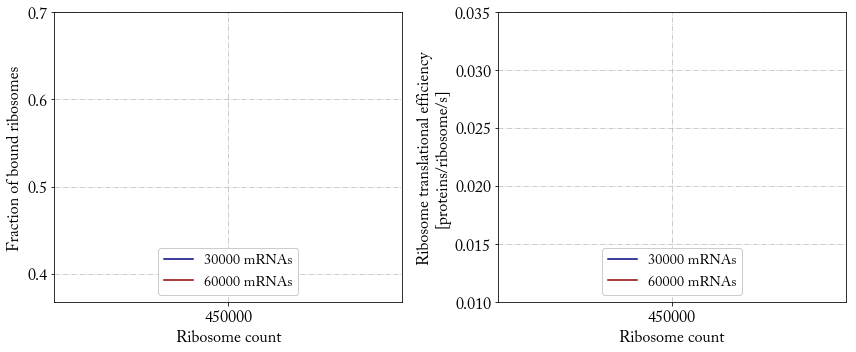

In [168]:
plt.close('all')

plt.rc('font',family='serif')
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['axes.labelcolor']='black'
plt.rcParams['xtick.color']='black'
plt.rcParams['ytick.color']='black'
plt.rcParams['grid.color']='grey'
plt.rcParams['grid.alpha']='0.5'
plt.rcParams['grid.linestyle']='-.'
#plt.rcParams['figure.facecolor'] = 'white'

hfont = {'fontname': u'Adobe Caslon Pro'}

#######################################################################################################################
# Two subplots sharing both x/y axes
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, subplot_kw=dict(axisbg='white'))
plt.grid()

#######################################################################################################################
x1 = np.array(ribo[ribo.keys()[0]])
y1 = np.array(ribo_bound[ribo.keys()[0]]) * 1.0 / np.array(ribo[ribo.keys()[0]])
ax1.plot(x1, y1, color='navy')

x1 = np.array(ribo[ribo.keys()[1]])
y1 = np.array(ribo_bound[ribo.keys()[1]]) * 1.0 / np.array(ribo[ribo.keys()[1]])
ax1.plot(x1, y1, color='darkred')

ax = ax1
ax.set_ylabel("Fraction of bound ribosomes", fontsize=16, **hfont)
plt.tick_params(axis='both', which='major', labelsize=16)

#xpos = np.arange(100000, 500001, 100000)
#xpos = np.arange(50, 501, 50)
xpos = np.array(ribo_numbers)
ax.set_xticks(xpos)
ax.set_xticklabels(xpos, fontsize=16, **hfont)

ypos = np.arange(0.4, 0.71, 0.1)
ax.set_yticks(ypos)
ax.set_yticklabels(ypos, fontsize=16, **hfont)

#ax.axhline(0.5, color='black', lw=2)

ax.set_xlabel("Ribosome count", fontsize=16, **hfont)

#ax.set_ylim([0.4, 0.8])

#ax.text(-50000, 0.9, "A", fontsize=16, weight="bold", **hfont)

ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.1f"))

ax.legend(labels=["30000 mRNAs", "60000 mRNAs"], loc='lower center', fancybox=True, framealpha=1.0,
          facecolor='white')
ax.grid()

#ax1.set_title('Sharing both axes')

#######################################################################################################################
#ax2.plot(x2, y2, color='black')

ax = ax2
trans_eff_per_ribo.T.plot(ax=ax, color=['navy', 'darkred'])
#xpos = np.arange(100000, 500001, 100000)
#xpos = np.arange(50, 501, 50)
xpos = np.array(ribo_numbers)

ypos = np.arange(0.01, 0.04, 0.005)
ax.set_xticks(xpos)
ax.set_yticks(ypos)
ax.set_yticklabels(["%.3f" % round(p, 3) for p in ypos], fontsize=16)
ax.set_ylabel("Ribosome translational efficiency\n[proteins/ribosome/s]", fontsize=16, **hfont)

ax.set_xlabel("Ribosome count", fontsize=16, **hfont)

#ax.set_ylim([0.01, 0.025])

#ax.text(-50000, 0.03, "B", fontsize=16, weight="bold", **hfont)

plt.legend(labels=["30000 mRNAs", "60000 mRNAs"], loc='lower center', fancybox=True, framealpha=1.0,
          facecolor='white')
ax.grid()

#######################################################################################################################
# Fine-tune figure; make subplots close to each other 
#f.subplots_adjust(hspace=0)
f.tight_layout()

#plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

plt.savefig("ribosome_efficiency_constant_transcriptome.pgf")

In [169]:
ribo_variation_df = trans_eff_per_ribo.T

In [170]:
ribo_variation_df.columns = ['TE_30061', 'TE_60000']

In [171]:
ribo_bound

{28296: [169684], 56592: [254429]}

In [172]:
ribo_variation_df['bound_28296'] = ribo_bound[28296]

In [173]:
ribo_variation_df['bound_56592'] = ribo_bound[56592]

In [174]:
ribo_variation_df

,TE_30061,TE_60000,bound_28296,bound_56592
450000,0.019387,0.028158,169684,254429


In [175]:
file_contents = pkl.load(open('../../results/ribo_variation_uniform_df.p', 'r'))
print file_contents

        TE_30061  TE_60000  bound_28296  bound_56592
50      0.018200  0.023533           24           35
100     0.017500  0.023433           52           74
150     0.018178  0.024556           65           88
200     0.018300  0.024233          103          127
250     0.018120  0.023787          115          164
300     0.018178  0.024144          154          199
350     0.017943  0.024400          174          234
400     0.017725  0.024083          210          269
450     0.018504  0.024178          218          306
500     0.018340  0.023827          248          346
1000    0.018207  0.024120          485          654
2000    0.018008  0.024022         1027         1326
5000    0.018231  0.024228         2529         3377
10000   0.018292  0.024345         5021         6663
20000   0.018488  0.024573         9738        13140
50000   0.018893  0.025217        23713        32625
100000  0.019350  0.026093        44867        63139
150000  0.019594  0.026756        64683       

In [176]:
ribo_variation_df = ribo_variation_df.append(file_contents)

In [178]:
ribo_variation_df.sort_index(inplace=True)

In [179]:
ribo_variation_df

,TE_30061,TE_60000,bound_28296,bound_56592
50,0.018200,0.023533,24,35
100,0.017500,0.023433,52,74
150,0.018178,0.024556,65,88
200,0.018300,0.024233,103,127
250,0.018120,0.023787,115,164
300,0.018178,0.024144,154,199
350,0.017943,0.024400,174,234
400,0.017725,0.024083,210,269
450,0.018504,0.024178,218,306
500,0.018340,0.023827,248,346


In [180]:
with open('../../results/ribo_variation_uniform_df.p', 'w') as handle:
    pkl.dump(ribo_variation_df, handle)

Check if the file is there and what it contains:

In [181]:
print pkl.load(open('../../results/ribo_variation_uniform_df.p', 'r'))

        TE_30061  TE_60000  bound_28296  bound_56592
50      0.018200  0.023533           24           35
100     0.017500  0.023433           52           74
150     0.018178  0.024556           65           88
200     0.018300  0.024233          103          127
250     0.018120  0.023787          115          164
300     0.018178  0.024144          154          199
350     0.017943  0.024400          174          234
400     0.017725  0.024083          210          269
450     0.018504  0.024178          218          306
500     0.018340  0.023827          248          346
1000    0.018207  0.024120          485          654
2000    0.018008  0.024022         1027         1326
5000    0.018231  0.024228         2529         3377
10000   0.018292  0.024345         5021         6663
20000   0.018488  0.024573         9738        13140
50000   0.018893  0.025217        23713        32625
100000  0.019350  0.026093        44867        63139
150000  0.019594  0.026756        64683       

In [182]:
ribo_variation_df['bound_28296'] / ribo_variation_df.index

50        0.480000
100       0.520000
150       0.433333
200       0.515000
250       0.460000
300       0.513333
350       0.497143
400       0.525000
450       0.484444
500       0.496000
1000      0.485000
2000      0.513500
5000      0.505800
10000     0.502100
20000     0.486900
50000     0.474260
100000    0.448670
150000    0.431220
200000    0.416220
250000    0.406952
300000    0.396790
350000    0.390003
400000    0.382630
450000    0.377076
Name: bound_28296, dtype: float64

In [184]:
ribo_variation_df['bound_56592'] / ribo_variation_df.index

50        0.700000
100       0.740000
150       0.586667
200       0.635000
250       0.656000
300       0.663333
350       0.668571
400       0.672500
450       0.680000
500       0.692000
1000      0.654000
2000      0.663000
5000      0.675400
10000     0.666300
20000     0.657000
50000     0.652500
100000    0.631390
150000    0.617427
200000    0.605760
250000    0.595904
300000    0.586630
350000    0.578617
400000    0.574342
450000    0.565398
Name: bound_56592, dtype: float64

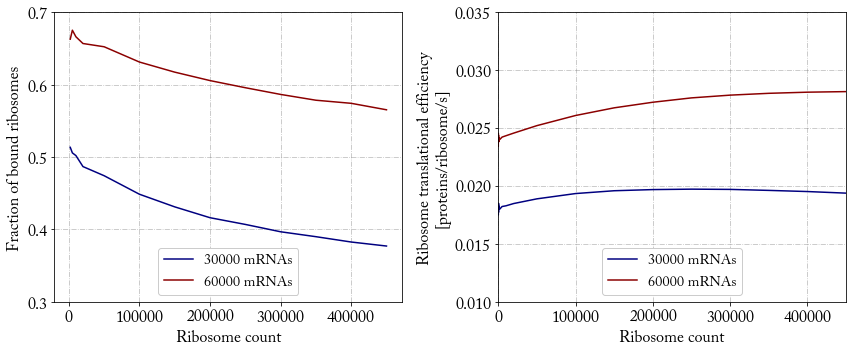

In [210]:
plt.close('all')

plt.rc('font',family='serif')
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['axes.labelcolor']='black'
plt.rcParams['xtick.color']='black'
plt.rcParams['ytick.color']='black'
plt.rcParams['grid.color']='grey'
plt.rcParams['grid.alpha']='0.5'
plt.rcParams['grid.linestyle']='-.'
plt.rcParams['xtick.labelsize'] = 16 
#plt.rcParams['figure.facecolor'] = 'white'

hfont = {'fontname': u'Adobe Caslon Pro', 'fontsize': 16}

#######################################################################################################################
# Two subplots sharing both x/y axes
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, subplot_kw=dict(axisbg='white'))
plt.grid()

#######################################################################################################################
x1 = ribo_variation_df.index
y1 = ribo_variation_df['bound_28296'] / ribo_variation_df.index
# cut off noisy beginnings
x1 = x1[11:]
y1 = y1[11:]
ax1.plot(x1, y1, color='navy')

x1 = ribo_variation_df.index
y1 = ribo_variation_df['bound_56592'] / ribo_variation_df.index
# cut off noisy beginnings
x1 = x1[11:]
y1 = y1[11:]
ax1.plot(x1, y1, color='darkred')

ax = ax1
ax.set_ylabel("Fraction of bound ribosomes", **hfont)
plt.tick_params(axis='both', which='major', labelsize=16)

#xpos = x1
#xpos = np.arange(50, 501, 50)
#xpos = np.array(ribo_numbers)
#ax.set_xticks(xpos)
#ax.set_xticklabels(xpos, fontsize=16, **hfont)

ypos = np.arange(0.3, 0.71, 0.1)
ax.set_yticks(ypos)
ax.set_yticklabels(ypos, **hfont)

#ax.set_xscale('log')
ax.set_xlabel("Ribosome count", **hfont)

#ax.set_ylim([0.4, 0.8])

#ax.text(-50000, 0.9, "A", fontsize=16, weight="bold", **hfont)

ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.1f"))

ax.legend(labels=["30000 mRNAs", "60000 mRNAs"], loc='lower center', fancybox=True, framealpha=1.0,
          facecolor='white')
ax.grid()

#ax1.set_title('Sharing both axes')

#######################################################################################################################
#ax2.plot(x2, y2, color='black')

ax = ax2
plot_df = ribo_variation_df[['TE_30061', 'TE_60000']]
plot_df.plot(ax=ax, color=['navy', 'darkred'])
#xpos = np.arange(100000, 500001, 100000)
#xpos = np.arange(50, 501, 50)
#xpos = np.array(ribo_numbers)

ypos = np.arange(0.01, 0.04, 0.005)
#ax.set_xticks(xpos)
ax.set_yticks(ypos)
ax.set_yticklabels(["%.3f" % round(p, 3) for p in ypos], fontsize=16)
ax.set_ylabel("Ribosome translational efficiency\n[proteins/ribosome/s]", **hfont)

ax.set_xlabel("Ribosome count", **hfont)

#ax.set_ylim([0.01, 0.025])

#ax.text(-50000, 0.03, "B", fontsize=16, weight="bold", **hfont)

plt.legend(labels=["30000 mRNAs", "60000 mRNAs"], loc='lower center', fancybox=True, framealpha=1.0,
          facecolor='white')
ax.grid()

#######################################################################################################################
# Fine-tune figure; make subplots close to each other 
#f.subplots_adjust(hspace=0)
f.tight_layout()

#plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

plt.savefig("ribosome_efficiency_constant_transcriptome.pgf")